# 11. Transfer Learning using VGG model, ALexa  etc,

In [2]:

import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


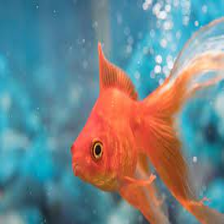

In [5]:
# loading the image for testing in model
gold_fish = Image.open("gold.jpg").resize(IMAGE_SHAPE)
gold_fish

In [6]:
# converting the image in 0 to 1
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [7]:
# adding a new axis
gold_fish[np.newaxis, ...]

array([[[[0.16862745, 0.43137255, 0.54509804],
         [0.16862745, 0.43137255, 0.54509804],
         [0.16470588, 0.42745098, 0.54117647],
         ...,
         [0.24705882, 0.72156863, 0.83921569],
         [0.31372549, 0.7372549 , 0.83921569],
         [0.31764706, 0.73333333, 0.83529412]],

        [[0.16862745, 0.43137255, 0.54509804],
         [0.16862745, 0.43137255, 0.54509804],
         [0.16470588, 0.42745098, 0.54117647],
         ...,
         [0.24313725, 0.72156863, 0.84313725],
         [0.30588235, 0.73333333, 0.84313725],
         [0.30980392, 0.72941176, 0.83921569]],

        [[0.16862745, 0.43137255, 0.54509804],
         [0.16862745, 0.43137255, 0.54509804],
         [0.16862745, 0.43137255, 0.54509804],
         ...,
         [0.23921569, 0.72156863, 0.85098039],
         [0.29411765, 0.73333333, 0.85882353],
         [0.29411765, 0.72941176, 0.85490196]],

        ...,

        [[0.56470588, 0.60392157, 0.61176471],
         [0.56470588, 0.60392157, 0.61176471]

In [8]:
# predicting by directly calling the classifier
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


(1, 1001)

In [9]:
# finding the category for the image
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [10]:
# defining a function which will take the category number as an input and return the label 
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [11]:
image_labels[predicted_label_index]

'goldfish'

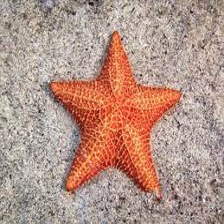

In [12]:
# predicting for starfish
star_fish = Image.open("star.jpg").resize(IMAGE_SHAPE)
star_fish

In [13]:
star_fish = np.array(star_fish)/255.0
star_fish.shape

(224, 224, 3)

In [14]:
star_fish[np.newaxis, ...]

array([[[[0.61176471, 0.58431373, 0.55294118],
         [0.68235294, 0.65490196, 0.62352941],
         [0.6745098 , 0.64705882, 0.61568627],
         ...,
         [0.56862745, 0.49019608, 0.43529412],
         [0.63921569, 0.54901961, 0.49019608],
         [0.75294118, 0.6627451 , 0.6       ]],

        [[0.62745098, 0.6       , 0.56862745],
         [0.60784314, 0.58039216, 0.54509804],
         [0.75294118, 0.7254902 , 0.69411765],
         ...,
         [0.58823529, 0.51372549, 0.45490196],
         [0.59607843, 0.50588235, 0.44705882],
         [0.70980392, 0.61960784, 0.55686275]],

        [[0.70588235, 0.67843137, 0.65098039],
         [0.61960784, 0.59215686, 0.56470588],
         [0.67843137, 0.65098039, 0.62352941],
         ...,
         [0.55294118, 0.4745098 , 0.41960784],
         [0.56470588, 0.4745098 , 0.41960784],
         [0.65882353, 0.56862745, 0.51372549]],

        ...,

        [[0.65098039, 0.62745098, 0.58823529],
         [0.75294118, 0.72941176, 0.68627451]

In [15]:
result = classifier.predict(star_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [16]:
predicted_label_index = np.argmax(result)
predicted_label_index

328

In [17]:
image_labels[predicted_label_index]

'starfish'